In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv
/kaggle/input/welcome-to-nepal-data-challenge-kaggle-engagemen/sample_submission.csv
/kaggle/input/welcome-to-nepal-data-challenge-kaggle-engagemen/test_updated.csv
/kaggle/input/welcome-to-nepal-data-challenge-kaggle-engagemen/train.csv
/kaggle/input/welcome-to-nepal-data-challenge-kaggle-engagemen/metaData.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Assuming the Iris dataset is available within the competition environment
data = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data['species'] = data['species'].str.replace('Iris-', '') 

In [6]:
# Shuffle the data for balanced class distribution
data = data.sample(frac=1, random_state=42)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [7]:
# Explore data types and missing values (if any)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 73 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [8]:
# Descriptive statistics
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


<Figure size 1500x1000 with 0 Axes>

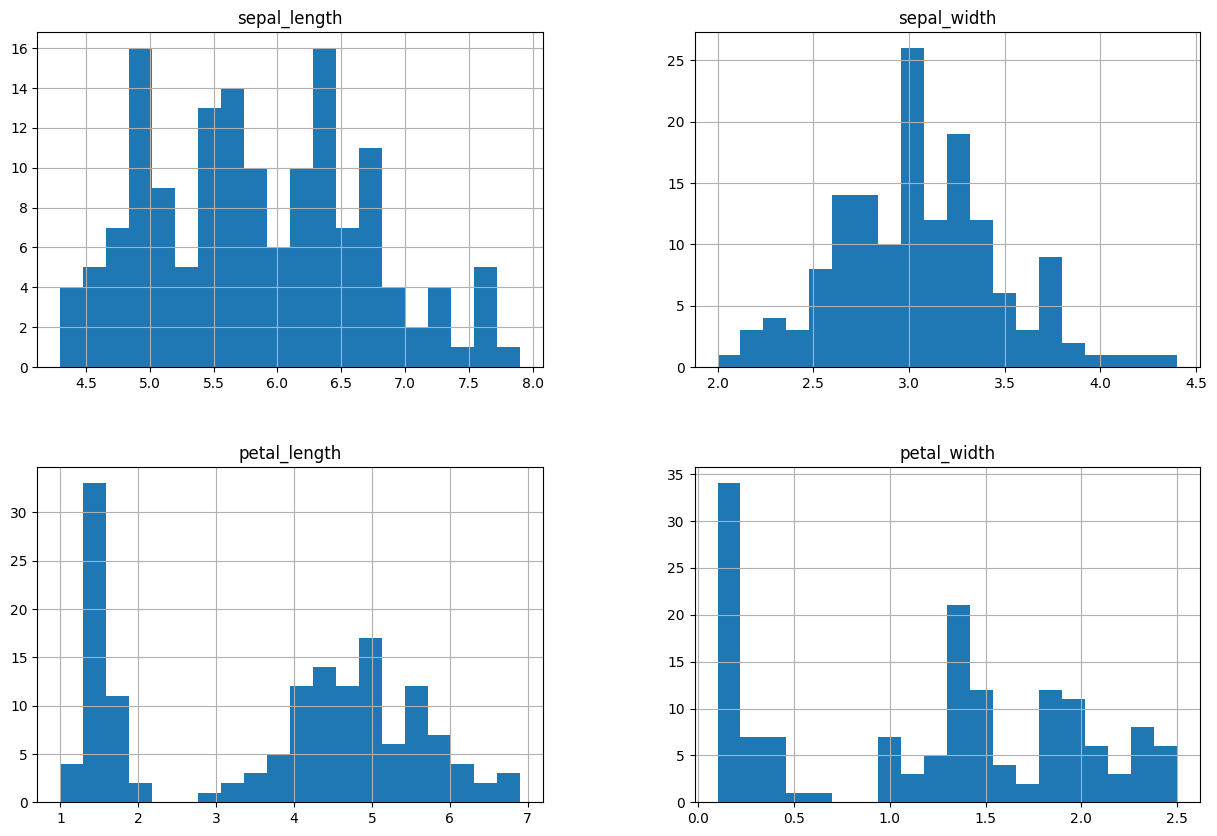

<Figure size 1500x1000 with 0 Axes>

In [9]:
# Visualize data distribution using histograms
data.hist(bins=20, figsize=(15, 10))
plt.figure(figsize=(15, 10))

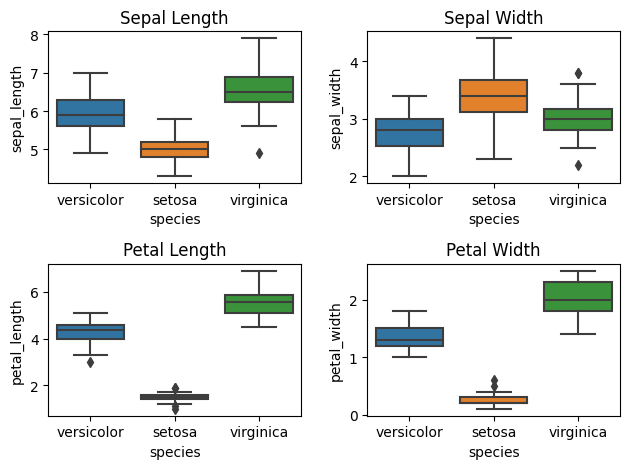

In [10]:
# Create boxplots to compare feature distributions across classes
plt.subplot(2,2,1)
plt.title("Sepal Length")
sns.boxplot(y="sepal_length", x="species", data=data)
plt.subplot(2,2,2)
plt.title("Sepal Width")
sns.boxplot(y="sepal_width", x="species", data=data)
plt.subplot(2,2,3)
plt.title("Petal Length")
sns.boxplot(y="petal_length", x="species", data=data)
plt.subplot(2,2,4)
plt.title("Petal Width")
sns.boxplot(y="petal_width", x="species", data=data)
plt.tight_layout()

In [11]:
# Separate features (X) and target variable (y)
X = data.drop("species", axis=1)  # Features
y = data["species"]  # Target variable

# Calculate the desired number of test samples (20)
test_size = 20 / len(data)  # Calculate the proportion for 20 test samples

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [12]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 101 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  20 non-null     float64
 1   sepal_width   20 non-null     float64
 2   petal_length  20 non-null     float64
 3   petal_width   20 non-null     float64
dtypes: float64(4)
memory usage: 800.0 bytes


In [13]:
# Create pipelines for data preparation (scaling and imputation)
numeric_features = X_train.columns
scaler = StandardScaler()
imputer = SimpleImputer(strategy="mean")
my_pipeline = Pipeline(steps=[("scaler", scaler), ("impute", imputer)])
full_pipeline = ColumnTransformer([("full", my_pipeline, numeric_features)])

In [14]:
# Apply data preparation pipelines to training and testing sets
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [15]:
print("Class Distribution in Training Set:")
print(y_train.value_counts())

Class Distribution in Training Set:
species
virginica     46
setosa        43
versicolor    41
Name: count, dtype: int64


In [16]:
# Define various classification algorithms
classifiers = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "Logistic Regression": LogisticRegression(),
}

# Perform cross-validation to estimate model performance
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_prepared, y_train, cv=4, scoring="accuracy")
    results[name] = scores.mean()
    print(f"\n{name} Mean: {scores.mean():.4f} (Std: {scores.std():.4f})")


K-Nearest Neighbors (KNN) Mean: 0.9458 (Std: 0.0263)

Random Forest Classifier Mean: 0.9460 (Std: 0.0260)

Support Vector Machine (SVM) Mean: 0.9536 (Std: 0.0273)

Logistic Regression Mean: 0.9460 (Std: 0.0137)


In [17]:
# Select the best model based on cross-validation scores (e.g., highest mean accuracy)
best_model_name = max(results, key=results.get) 
best_model = classifiers[best_model_name] 

# Train the best model on the entire training set
best_model.fit(X_train_prepared, y_train)

# Test set evaluation (important for real-world performance)
y_pred_test = best_model.predict(X_test_prepared)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy({best_model_name}): {test_accuracy:.2%}")

Test Accuracy(Support Vector Machine (SVM)): 100.00%


In [18]:
example_ids = list(range(1, len(y_pred_test) + 1))
submission_df = pd.DataFrame({'ID Column': example_ids, 'Prediction': y_pred_test})
submission_df.to_csv("Datalligence_submission.csv", index=False)

print("Submission file 'Datalligence_submission.csv' created successfully!")

Submission file 'Datalligence_submission.csv' created successfully!
